In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Geolocation_dataset

Read files csv

In [3]:
df_geo = pd.read_csv('data/geolocation.csv')

In [4]:
df_customer = pd.read_csv('data/customers.csv')

In [5]:
df_orders = pd.read_csv('data/orders.csv')

In [6]:
df_geo = df_geo.loc[:, ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_state']]

In [7]:
df_geo = df_geo.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"})

In [8]:
df_customer = df_customer.loc[:, ['customer_id', 'customer_zip_code_prefix', 'customer_state']]

In [9]:
df_customer = df_customer.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"})

Join df_customer + df_geo

In [10]:
#df_g_c = df_customer.join(df_geo, on='zip_code_prefix', how = 'left', lsuffix = '_left', rsuffix = '_right')
df_g_c = df_customer.join(df_geo.set_index('zip_code_prefix'), on='zip_code_prefix')
#df_g_c[df_g_c['customer_id']=='06b8999e2fba1a1fbc88172c00ba8bc7']

In [11]:
df_orders = df_orders.loc[:, ['order_id', 'customer_id', 'order_status']]

### geolocation_state code

Read map (.gpkg)

In [12]:
info = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')
info = info.rename(columns={"sigla": "geolocation_state"})

In [13]:
df_map = df_g_c.join(info.set_index('geolocation_state'), on='geolocation_state')


In [14]:
dfm = df_map[['customer_id', 'geolocation_state', 'geometry']]

In [15]:
dfm_group = dfm.groupby('geolocation_state').apply(lambda x: x.iloc[0])

In [16]:
dfm_group = dfm_group.reset_index(drop=True)

In [17]:
dfm_group = dfm_group.rename(columns={"geolocation_state": "geo"})

In [18]:
df_map_count = df_map.groupby('geolocation_state').count()

In [19]:
df_map_customer = pd.DataFrame(df_map_count.iloc[:,0]).reset_index()

In [20]:
df_map_customer['geometry'] = ''

Fare join tra geolocation_state e sigla

In [21]:
df_mapping = df_map_customer.merge(dfm_group, on=df_map_customer.index)
df_mapping = df_mapping.rename(columns={'customer_id_x':'customer_count', 'geometry_y':'geometry'})
df_mapping = df_mapping[['geolocation_state', 'customer_count', 'geometry']]

In [22]:
from shapely.geometry import Polygon

In [23]:
df_mapping['geometry'] = gpd.GeoSeries(df_mapping.iloc[:,2])

In [24]:
df_mapping = df_mapping.sort_values(by='customer_count', ascending=False).reset_index(drop=True)
df_mapping.head()

,geolocation_state,customer_count,geometry
0,SP,5620430,"MULTIPOLYGON (((-45.01051 -23.76176, -45.01624..."
1,RJ,3015690,"MULTIPOLYGON (((-41.70343 -22.42014, -41.70380..."
2,MG,2878728,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
3,RS,805370,"MULTIPOLYGON (((-53.03425 -27.15455, -53.03079..."
4,PR,626021,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."


In [25]:
serie = pd.Series((df_mapping.iloc[:,1]).values, index = df_mapping['geolocation_state'])
a = list(serie[:10].index)

Contare il numero di ordini in base al geolocation_state e sfumare le aree

In [26]:
gdf = gpd.GeoDataFrame(df_mapping, geometry='geometry')

Dataframe finale

In [27]:
gdf

,geolocation_state,customer_count,geometry
0,SP,5620430,"MULTIPOLYGON (((-45.01051 -23.76176, -45.01624..."
1,RJ,3015690,"MULTIPOLYGON (((-41.70343 -22.42014, -41.70380..."
2,MG,2878728,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
3,RS,805370,"MULTIPOLYGON (((-53.03425 -27.15455, -53.03079..."
4,PR,626021,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
5,SC,538638,"MULTIPOLYGON (((-48.63761 -25.97490, -48.63504..."
6,BA,365875,"MULTIPOLYGON (((-38.97119 -8.78270, -38.95972 ..."
7,ES,316654,"MULTIPOLYGON (((-40.47978 -17.91795, -40.46958..."
8,GO,133146,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
9,MT,122395,"MULTIPOLYGON (((-60.10041 -12.91271, -60.09773..."


## Map

<BarContainer object of 10 artists>

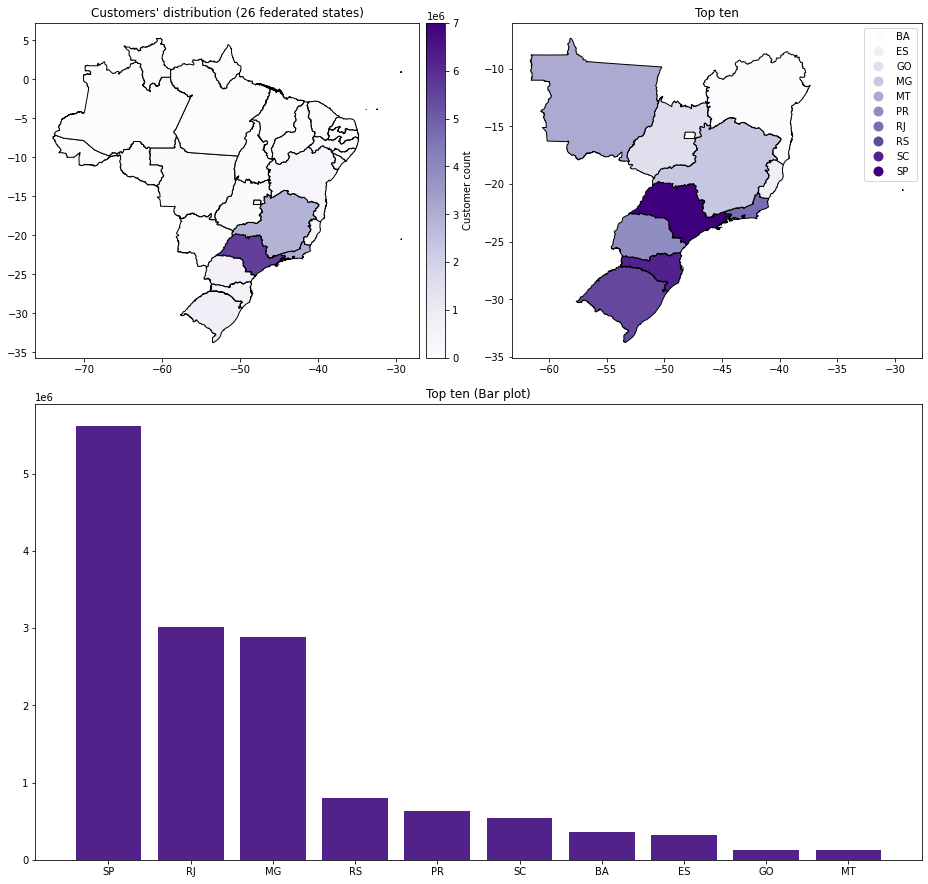

In [30]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True,figsize=(13,13))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.set_title("Customers' distribution (26 federated states)")
ax2.set_title('Top ten')
ax3.set_title('Top ten (Bar plot)')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(ax=ax1, column=serie, legend=True, vmin = 0, vmax = 7000000,
         edgecolor='black',legend_kwds={'label': 'Customer count'}, cax=cax, cmap='Purples')
gdf[:10].plot(ax=ax2, column=gdf.iloc[:10,0], categorical=True, edgecolor='black', legend=True, cmap='Purples')
ax3.bar(df_mapping.iloc[:10,0], df_mapping.iloc[:10,1], color = '#52228B', label='Pay')